In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
top = pd.read_csv('top200.csv')
bottom = pd.read_csv('bottom200.csv')
top['type'] = 1 # 1 for top
bottom['type'] = 0 # 0 for bottom
df = pd.concat([top, bottom], ignore_index=True)
df.head()

,title,artist,genre,rank,danceability,energy,key,loudness,mode,speechiness,...,spring,summer,autumn,id,chorus,lyrics_nb_max,lyrics_nb_moy,nb_words_chorus,nb_different_words_chorus,type
0,TOUT VA BIEN (feat. Ninho & Naps),Alonzo,rap,1,0.660,0.720,3.0,-5.874,0.0,0.0753,...,1,1,1,6OZwia8loN0aPS0vTvsBjR,"['cherie', 'veut', 'yves', 'saint', 'lau', 'la...",53,2.489362,45,30,1
1,FADE UP,ZEG P,autre,2,0.758,0.599,4.0,-5.990,0.0,0.0877,...,0,1,1,4ZpIuzx91EAPK3VimONbfB,"['fade', 'fade', 'nan', 'fade', 'fade', 'nan',...",32,2.637500,12,2,1
2,DIE,Gazo,rap,3,0.695,0.630,8.0,-7.160,0.0,0.0350,...,0,1,1,3D29kjUyWxsT3jUUTtARVQ,"['crois', 'evite', 'alors', 'maille', 'maille'...",14,2.200000,34,19,1
3,PETETE,Gambi,rap,4,0.752,0.669,10.0,-9.817,0.0,0.2510,...,0,1,1,0z3bi63SNZ5ylyHOzb81Uq,"['cr', 'partout', 'bloc', 'okay', 'khabat', 'v...",14,2.208633,38,27,1
4,Time Time,Trei Degete,autre,5,0.715,0.799,0.0,-6.447,0.0,0.0433,...,0,0,1,5wKDPtbdggE1roeVp3UdXX,"['dansam', 'time', 'time', 'dansam', 'time', '...",160,13.423077,67,12,1


In [3]:
df = df.drop(['title', 'artist', 'rank', 'lyrics', 'id', 'chorus'], axis = 1)
df = pd.get_dummies(df, columns=['genre'])
df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,lyrics_nb_moy,nb_words_chorus,nb_different_words_chorus,type,genre_autre,genre_hip hop,genre_pop,genre_r&b,genre_rap,genre_rock
0,0.660,0.720,3.0,-5.874,0.0,0.0753,0.3010,0.000000,0.2260,0.628,...,2.489362,45,30,1,0,0,0,0,1,0
1,0.758,0.599,4.0,-5.990,0.0,0.0877,0.5700,0.000001,0.1290,0.557,...,2.637500,12,2,1,1,0,0,0,0,0
2,0.695,0.630,8.0,-7.160,0.0,0.0350,0.2290,0.000000,0.1180,0.550,...,2.200000,34,19,1,0,0,0,0,1,0
3,0.752,0.669,10.0,-9.817,0.0,0.2510,0.1670,0.000000,0.0795,0.627,...,2.208633,38,27,1,0,0,0,0,1,0
4,0.715,0.799,0.0,-6.447,0.0,0.0433,0.0141,0.003500,0.3420,0.916,...,13.423077,67,12,1,1,0,0,0,0,0


In [4]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=True) * 100

winter                       0.000000
genre_r&b                    0.000000
genre_pop                    0.000000
genre_hip hop                0.000000
genre_autre                  0.000000
type                         0.000000
nb_different_words_chorus    0.000000
nb_words_chorus              0.000000
lyrics_nb_moy                0.000000
lyrics_nb_max                0.000000
autumn                       0.000000
summer                       0.000000
spring                       0.000000
genre_rock                   0.000000
genre_rap                    0.000000
duration_ms                  0.042141
time_signature               0.126422
tempo                        0.126422
valence                      0.126422
liveness                     0.126422
instrumentalness             0.126422
acousticness                 0.126422
speechiness                  0.126422
mode                         0.126422
loudness                     0.126422
key                          0.126422
energy      

In [5]:
def fill_empty(df):

    fill0 = ['time_signature','duration_ms','tempo','valence','danceability','acousticness','speechiness','mode', 'loudness', 'key', 'energy',
            'instrumentalness', 'liveness']

    for col in fill0:
        df[col].fillna(0, inplace=True)
        
    return df

In [6]:
df = fill_empty(df)

In [7]:
df.shape

(2373, 28)

In [8]:
X = df.drop('type', axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif 
model = make_pipeline(RobustScaler(), SelectKBest(f_classif, k=27), LogisticRegression(max_iter=1000))

In [10]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [11]:
def evaluation(model):

    model.fit(X_train, y_train)
        
    ypred = model.predict(X_test)
        
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))

In [12]:
evaluation(model)

[[ 98 106]
 [ 56 215]]
              precision    recall  f1-score   support

           0       0.64      0.48      0.55       204
           1       0.67      0.79      0.73       271

    accuracy                           0.66       475
   macro avg       0.65      0.64      0.64       475
weighted avg       0.66      0.66      0.65       475



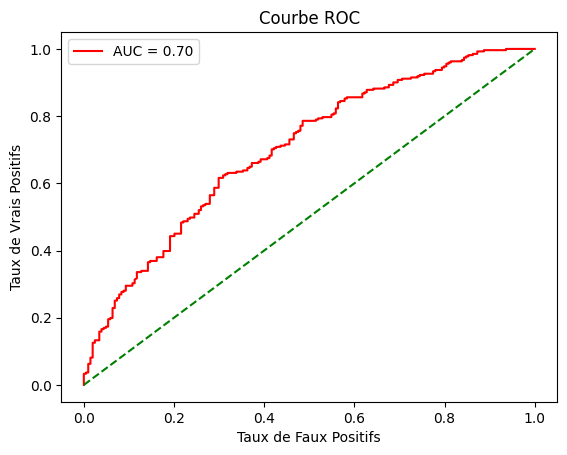

In [13]:
# Importation de la fonction qui permet de calculer les valeurs de la courbe
from sklearn.metrics import roc_curve, auc
# Calcul des faux positifs et vrais positifs en fonction des seuils
y_prob = model.predict_proba(X_test)
probs = y_prob[:, 1]
faux_positifs, vrais_positifs, seuils = roc_curve(y_test, probs)
# Calcul de l'aire sous la courbe
roc_auc = auc(faux_positifs, vrais_positifs)
# Visualisation de la courbe ROC
plt.plot(faux_positifs, vrais_positifs, color='red', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='green', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend()
plt.show()

In [14]:
pd.DataFrame(y_prob[:,1])

,0
0,0.684778
1,0.833076
2,0.714654
3,0.309966
4,0.782927
...,...
470,0.756447
471,0.499390
472,0.689069
473,0.821765


In [44]:
y_test.reset_index()['type']

0      1
1      1
2      1
3      1
4      1
      ..
470    1
471    0
472    1
473    1
474    1
Name: type, Length: 475, dtype: int64

In [68]:
y_prob = model.predict_proba(X_test)
df_prob = pd.DataFrame(y_prob[:,1])
mask_60 = df_prob[0] > 0
a=0
b=0
i = 0
while i < len(mask_60):
    if mask_60[i] == True:
        a +=1
        if (y_test.reset_index()['type'][i]==1):
            b +=1
    i+=1
print(b/a)

0.5705263157894737


In [15]:
# Affichage des coefficients
pd.DataFrame(np.concatenate([model.named_steps['logisticregression'].intercept_.reshape(-1,1),
 model.named_steps['logisticregression'].coef_],axis=1),
 index = ["coef"],
 columns = ["constante"]+list(X.columns)).T.sort_values(by="coef",ascending=False, key=abs)

,coef
genre_autre,0.889043
genre_rock,-0.829936
constante,0.664333
summer,-0.629745
autumn,-0.475972
nb_different_words_chorus,0.441555
winter,-0.372916
spring,-0.316257
danceability,0.285812
mode,-0.260609
